In [79]:
# Install necessary packages if not already installed (uncomment to install)
# !pip install pandas numpy matplotlib seaborn jiwer

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jiwer import wer, cer, compute_measures
import os

# Set seaborn style for plots
sns.set(style='whitegrid')
%matplotlib inline


## Loading the Datasets

In [80]:
# Specify the CSV file path
csv_file_path = 'inferenced_dataset.csv'  # Replace with your actual CSV file path

# Check if the file exists
if os.path.isfile(csv_file_path):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(csv_file_path)
    print(f"Data loaded successfully. Number of samples: {len(df)}")
else:
    print(f"CSV file {csv_file_path} does not exist.")


Data loaded successfully. Number of samples: 180


## Cleaning

In [81]:
# Check for missing values
missing_gold_label = df['Gold Label'].isnull().sum()
missing_response = df['Response'].isnull().sum()
print(f"Missing 'Gold Label' entries: {missing_gold_label}")
print(f"Missing 'Response' entries: {missing_response}")

# Drop rows with missing 'Gold Label' or 'Response'
df.dropna(subset=['Gold Label', 'Response'], inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Confirm data after preprocessing
print(f"Data after preprocessing. Number of samples: {len(df)}")


Missing 'Gold Label' entries: 0
Missing 'Response' entries: 0
Data after preprocessing. Number of samples: 180


## Defining Evaluation Functions

In [82]:
# Function to compute WER, CER, and detailed error counts for each pair of texts
def compute_error_rates(df):
    """
    Computes WER, CER, and error counts for each row in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing 'Gold Label' and 'Response' columns.

    Returns:
        pd.DataFrame: DataFrame with additional 'WER', 'CER', and error count columns.
    """
    wer_list = []
    cer_list = []
    substitutions = []
    insertions = []
    deletions = []
    hits = []
    for idx, row in df.iterrows():
        ground_truth = str(row['Gold Label']).strip()
        hypothesis = str(row['Response']).strip()
        # Compute WER and CER
        wer_value = wer(ground_truth, hypothesis)
        cer_value = cer(ground_truth, hypothesis)
        wer_list.append(wer_value)
        cer_list.append(cer_value)
        # Compute detailed error counts
        measures = compute_measures(ground_truth, hypothesis)
        substitutions.append(measures['substitutions'])
        insertions.append(measures['insertions'])
        deletions.append(measures['deletions'])
        hits.append(measures['hits'])
    df['WER'] = wer_list
    df['CER'] = cer_list
    df['Substitutions'] = substitutions
    df['Insertions'] = insertions
    df['Deletions'] = deletions
    df['Hits'] = hits
    return df


## Extended Evaluation: Analysis by Blur and Background Color

### Analysis of WER and CER by Blur Levels (Font Size 18)

#### Filter Data for Font Size 18

In [96]:
# Filter the DataFrame for entries with 'Font Size' equal to 18
df_font18 = df[df['Font Size'] == 18].copy()

print(f"Number of samples with Font Size 18: {len(df_font18)}")

Number of samples with Font Size 18: 140


#### Compute Mean WER and CER by Blur Levels

In [97]:
# Group by 'Blur' levels and compute mean WER and CER
blur_metrics = df_font18.groupby('Blur Level').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Blur Levels (Font Size 18):")
print(blur_metrics)

Mean WER and CER by Blur Levels (Font Size 18):
   Blur Level       WER       CER
0        0.00  0.269347  0.121286
1        1.25  0.253626  0.100276
2        1.75  0.345865  0.186306


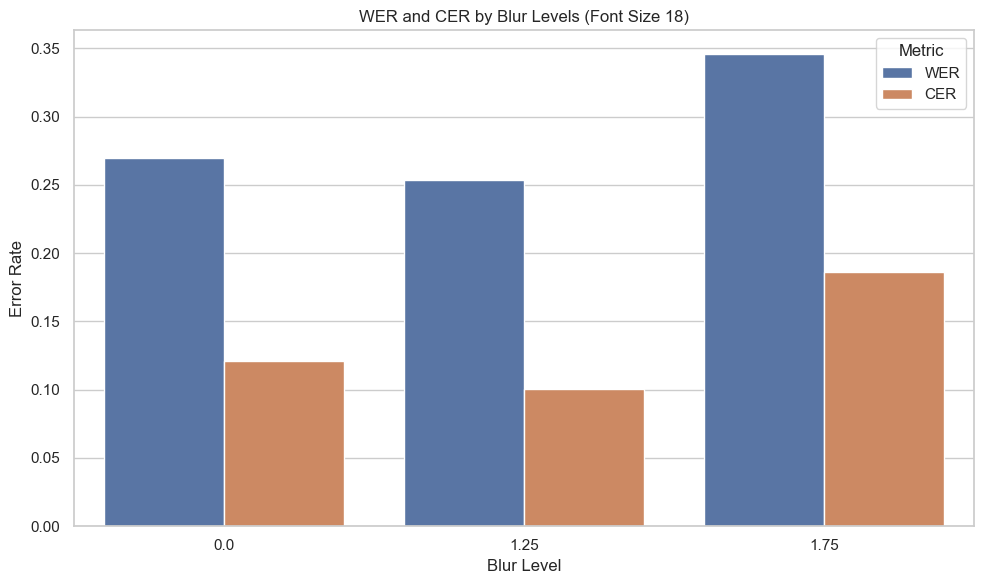

In [100]:
# Bar plot of WER and CER by Blur Levels
blur_metrics_melted = blur_metrics.melt(id_vars='Blur Level', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

plt.figure(figsize=(10, 6))
sns.barplot(x='Blur Level', y='Value', hue='Metric', data=blur_metrics_melted)
plt.title('WER and CER by Blur Levels (Font Size 18)')
plt.xlabel('Blur Level')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Analysis of WER and CER by Background Color (Font Size 18)

### Compute Mean WER and CER by Background Color

In [101]:
# Group by 'Background Color' and compute mean WER and CER
bg_metrics = df_font18.groupby('Background Color').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Background Color (Font Size 18):")
print(bg_metrics)

Mean WER and CER by Background Color (Font Size 18):
  Background Color       WER       CER
0                0  0.257555  0.111206
1     light_yellow  0.236439  0.085608
2       slate_gray  0.422009  0.251375


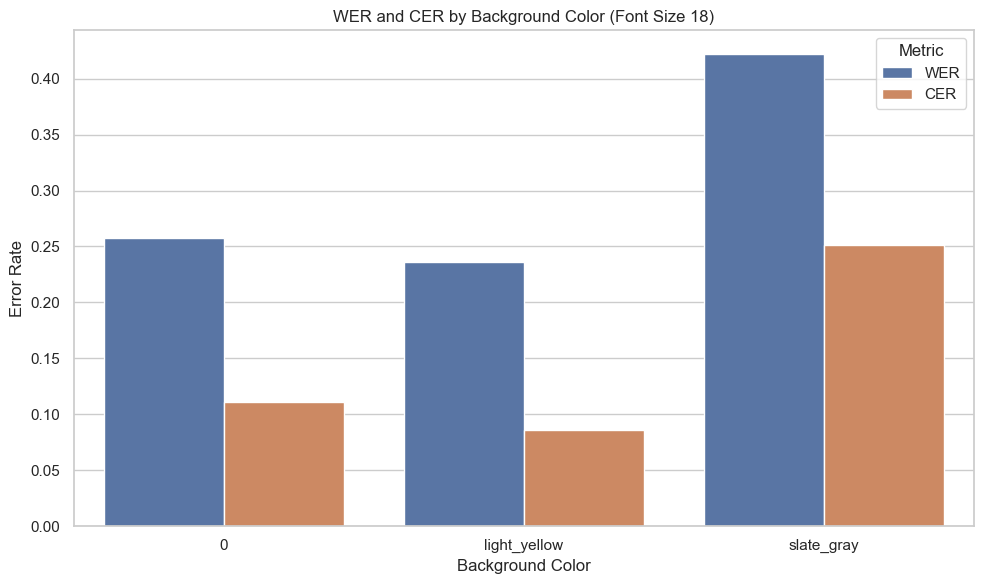

In [104]:
# Bar plot of WER and CER by Background Color
plt.figure(figsize=(10, 6))
sns.barplot(x='Background Color', y='Value', hue='Metric', data=bg_metrics_melted)
plt.title('WER and CER by Background Color (Font Size 18)')
plt.xlabel('Background Color')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Analysis of WER and CER by Font Style (Font Size 18)

In [105]:
# Filter the DataFrame for entries with 'Font Size' equal to 18
df_font18 = df[df['Font Size'] == 18].copy()

print(f"Number of samples with Font Size 18: {len(df_font18)}")


Number of samples with Font Size 18: 140


In [106]:
# Group by 'Font Style' and compute mean WER and CER
font_style_metrics = df_font18.groupby('Font Style').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Font Style (Font Size 18):")
print(font_style_metrics)

Mean WER and CER by Font Style (Font Size 18):
               Font Style       WER       CER
0          Alvi Nastaleeq  0.195762  0.058455
1  Jameel Noori Nastaleeq  0.296150  0.140114
2        Nafees Nastaleeq  0.269713  0.133991


### Bar Plot for WER and CER by Font Style

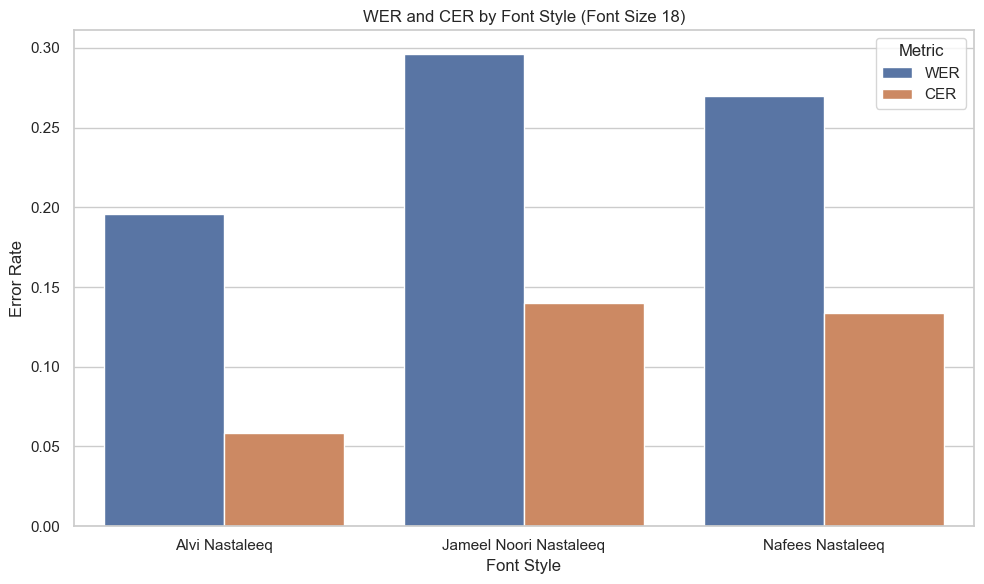

In [107]:
# Melt the DataFrame for plotting
font_style_melted = font_style_metrics.melt(id_vars='Font Style', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Bar plot of WER and CER by Font Style
plt.figure(figsize=(10, 6))
sns.barplot(x='Font Style', y='Value', hue='Metric', data=font_style_melted)
plt.title('WER and CER by Font Style (Font Size 18)')
plt.xlabel('Font Style')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

## Analysis of WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq, Blur Level: 0, Background Color: 0)

In [114]:
# Filter the DataFrame
df_jameel = df[
    (df['Font Style'] == 'Jameel Noori Nastaleeq') &
    (df['Blur Level'] == 0) &
    (df['Background Color'] == '0')
].copy()

print(f"Number of samples with Font Style 'Jameel Noori Nastaleeq', Blur 0, Background Color 0: {len(df_jameel)}")

# Group by 'Font Size' and compute mean WER and CER
font_size_metrics = df_jameel.groupby('Font Size').agg({'WER': 'mean', 'CER': 'mean'}).reset_index()

print("Mean WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq):")
print(font_size_metrics)

Number of samples with Font Style 'Jameel Noori Nastaleeq', Blur 0, Background Color 0: 60
Mean WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq):
   Font Size       WER       CER
0         12  0.374122  0.208829
1         18  0.222812  0.077003
2         24  0.196970  0.034317


### Bar Plot for WER and CER by Font Size

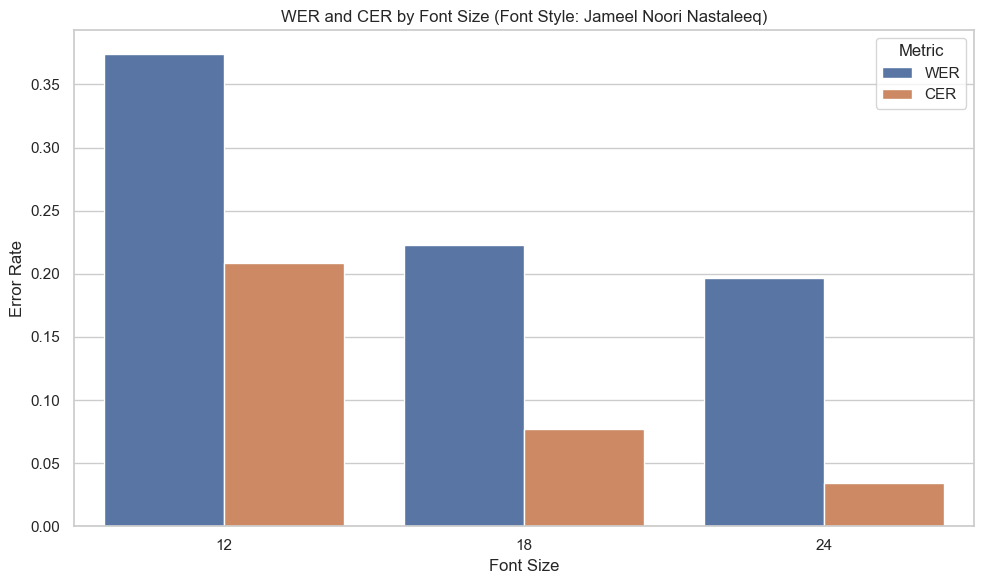

In [115]:
# Melt the DataFrame for plotting
font_size_melted = font_size_metrics.melt(id_vars='Font Size', value_vars=['WER', 'CER'], var_name='Metric', value_name='Value')

# Bar plot of WER and CER by Font Size
plt.figure(figsize=(10, 6))
sns.barplot(x='Font Size', y='Value', hue='Metric', data=font_size_melted)
plt.title('WER and CER by Font Size (Font Style: Jameel Noori Nastaleeq)')
plt.xlabel('Font Size')
plt.ylabel('Error Rate')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()